<a href="https://colab.research.google.com/github/shawakash/Ml-Projects/blob/Pytorch/02_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# Datasets - Toy Datasets

import sklearn
from sklearn.datasets import make_circles

# Samples
n_samples = 1000

# Sets
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [68]:
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [69]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "y": y})

circles.head(10)

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


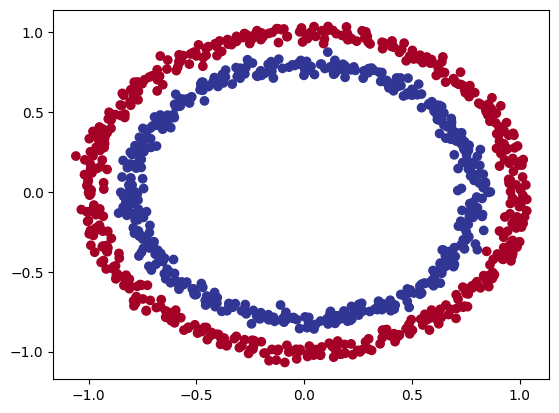

In [70]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [71]:
# Input and Output shapes

X.shape, y.shape

((1000, 2), (1000,))

In [72]:
X_sample = X[0]
y_sample = y[0]
X_sample, X_sample.shape, y_sample, y_sample.shape

(array([0.75424625, 0.23148074]), (2,), 1, ())

In [73]:
# Turning Datasets to tensor and train and test splits
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [74]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [75]:
# Spliting Dataset Randomly
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

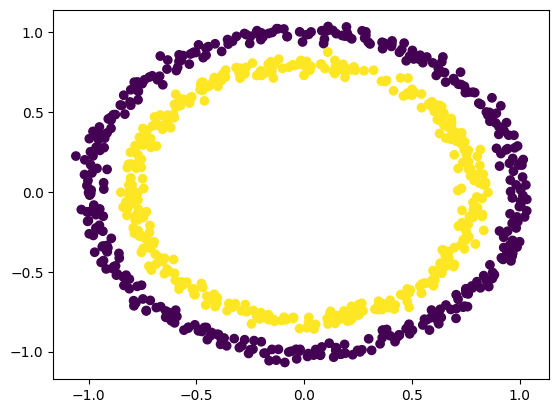

In [76]:
plt.scatter(X_train[:,0],
            X_train[:,1],
            c=y_train)

In [77]:
# Making Device Agnostic Code
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [78]:
# Model

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__();

    self.layer_1 = nn.Linear(in_features=2,
                                  out_features=10)

    self.layer_2 = nn.Linear(in_features=10,
                                  out_features=1)

    # self.layer_seq = nn.Sequential(
    #     nn.Linear(in_features=2,
    #               out_features=10),
    #     nn.Linear(in_features=10,
    #               out_features=1)
    # )


  def forward(self, x: torch.tensor) -> torch.tensor:
    # return self._layer_seq(x)
    return self.layer_2(self.layer_1(x))


model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)

In [79]:
# Using nn.Sequential to make models
torch.manual_seed(42)

model_1 = nn.Sequential(
    nn.Linear(in_features=2,
              out_features=10),
    nn.Linear(in_features=10,
              out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)

In [80]:
# Getting some untrained predictions
with torch.inference_mode():
  untrained_preds = model_1(X_test)

torch.round(untrained_preds[:5]), y_test[:5]

(tensor([[-0.],
         [0.],
         [-0.],
         [-0.],
         [-0.]]),
 tensor([1., 0., 1., 0., 1.]))

In [81]:
#  Loss function and optimizer

# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [82]:
# Calculate Accuracy - % of correct prediction

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [83]:
model_1.eval()

with torch.inference_mode():
  y_logits = model_1(X_test)[:5]

y_logits

tensor([[-0.1566],
        [ 0.0115],
        [-0.3692],
        [-0.0972],
        [-0.0075]])

In [84]:
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.4609],
        [0.5029],
        [0.4087],
        [0.4757],
        [0.4981]])

In [85]:
torch.round(y_preds_probs)

tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.]])

In [86]:
y_preds = torch.round(y_preds_probs).squeeze()
y_preds_labels = torch.round(torch.sigmoid(model_1(X_test))[:5]).squeeze()
y_preds_labels == y_preds

tensor([True, True, True, True, True])

In [87]:
y_preds_labels, y_test[:5]

(tensor([0., 1., 0., 0., 0.], grad_fn=<SqueezeBackward0>),
 tensor([1., 0., 1., 0., 1.]))

In [95]:
# Training the model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train) #   BCELosswithLogits require y_logits as y_preds
  # But BCELoss requires loss_fn(torch.sigmoid(y_logits), y_test)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Testing
  model_1.eval()

  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  #  Prints
  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69320, Accuracy: 51.38% | Test loss: 0.69635, Test acc: 47.50%
Epoch: 10 | Loss: 0.69319, Accuracy: 51.25% | Test loss: 0.69632, Test acc: 47.50%
Epoch: 20 | Loss: 0.69318, Accuracy: 51.25% | Test loss: 0.69629, Test acc: 47.50%
Epoch: 30 | Loss: 0.69318, Accuracy: 51.12% | Test loss: 0.69626, Test acc: 47.50%
Epoch: 40 | Loss: 0.69317, Accuracy: 51.12% | Test loss: 0.69623, Test acc: 47.50%
Epoch: 50 | Loss: 0.69316, Accuracy: 51.12% | Test loss: 0.69620, Test acc: 47.50%
Epoch: 60 | Loss: 0.69316, Accuracy: 51.25% | Test loss: 0.69618, Test acc: 47.50%
Epoch: 70 | Loss: 0.69315, Accuracy: 51.25% | Test loss: 0.69615, Test acc: 47.50%
Epoch: 80 | Loss: 0.69314, Accuracy: 51.12% | Test loss: 0.69612, Test acc: 47.00%
Epoch: 90 | Loss: 0.69314, Accuracy: 51.12% | Test loss: 0.69610, Test acc: 47.00%
Epoch: 100 | Loss: 0.69313, Accuracy: 51.12% | Test loss: 0.69607, Test acc: 47.00%
Epoch: 110 | Loss: 0.69313, Accuracy: 51.12% | Test loss: 0.69605, Test acc: 47.00%
Epo

In [101]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Helper function already exist :)")
else:
  print("Downloading the helper function file for you:)")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Helper function already exist :)


In [ ]:
# Plot decision boundary